In [1]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('longley.csv').drop('Population', axis=1)
data

,GNP.deflator,GNP,Unemployed,Armed.Forces,Year,Employed
0,83.0,234.289,235.6,159.0,1947,60.323
1,88.5,259.426,232.5,145.6,1948,61.122
2,88.2,258.054,368.2,161.6,1949,60.171
3,89.5,284.599,335.1,165.0,1950,61.187
4,96.2,328.975,209.9,309.9,1951,63.221
5,98.1,346.999,193.2,359.4,1952,63.639
6,99.0,365.385,187.0,354.7,1953,64.989
7,100.0,363.112,357.8,335.0,1954,63.761
8,101.2,397.469,290.4,304.8,1955,66.019
9,104.6,419.180,282.2,285.7,1956,67.857


In [4]:
X = data.drop('Employed', axis=1)
y = data.Employed

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1479)

In [6]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [7]:
print('Mean squad error on train data, linear regression:', mean_squared_error(y_train, linear.predict(X_train)))
print('Mean squad error on test data, linear regression:', mean_squared_error(y_test, linear.predict(X_test)))

Mean squad error on train data, linear regression: 0.016062203299101623
Mean squad error on test data, linear regression: 0.17146444645945905


In [8]:
i_arr = range(0, 26)
lamda_arr = [10**(-3 + 0.2*i) for i in i_arr]

In [9]:
test_mse = []
train_mse = []
for lamda in lamda_arr:
    ridge = Ridge(alpha=lamda, random_state=0)
    ridge.fit(X_train, y_train)
    test_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))
    train_mse.append(mean_squared_error(y_train, ridge.predict(X_train)))

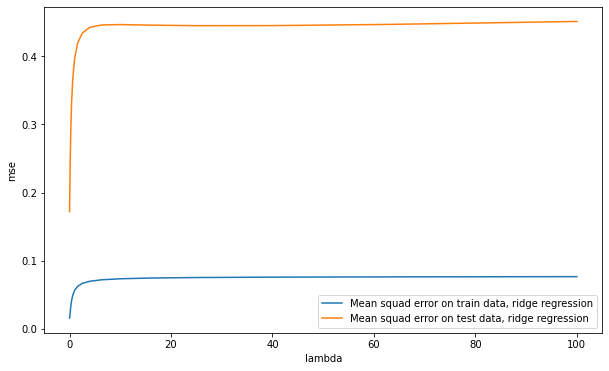

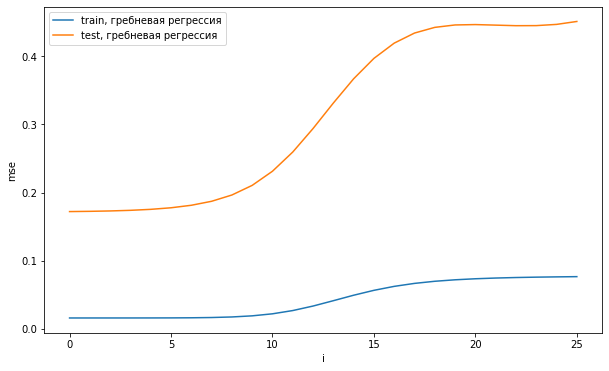

In [10]:
plt.figure(figsize=(10,6))
plt.plot(lamda_arr, train_mse, label='Mean squad error on train data, ridge regression')
plt.plot(lamda_arr, test_mse, label='Mean squad error on test data, ridge regression')
plt.xlabel('lambda')
plt.ylabel('mse')
plt.legend()
plt.figure(figsize=(10,6))
plt.plot(i_arr, train_mse, label='train, гребневая регрессия')
plt.plot(i_arr, test_mse, label='test, гребневая регрессия')
plt.xlabel('i')
plt.ylabel('mse')
plt.legend()

In [23]:
print('Min MSE, train, гребневая регрессия:', min(train_mse))
print('Min MSE, test, гребневая регрессия:',  min(test_mse))

Min MSE, train, гребневая регрессия: 0.007086315256682494
Min MSE, test, гребневая регрессия: 0.15653220214573219
